In [89]:
import cPickle as pic
import numpy as np
import matplotlib.pyplot as plt
from Bio import Seq
import operator


In [2]:
good_reads = pic.load(open("data/good_reads.pkl", "rb"))
WT = "ATGGATGTATTCATGAAAGGACTTTCAAAGGCCAAGGAGGGAGTTGTGGCTGCTGCTGAGAAAACCAAACAGGGTGTGGCAGAAGCAGCAGGAAAGACAAAAGAGGGTGTTCTCTATGTAGGCTCCAAAACCAAGGAGGGAGTGGTGCATGGTGTGGCAACAGTGGCTGAGAAGACCAAAGAGCAAGTGACAAATGTTGGAGGAGCAGTGGTGACGGGTGTGACAGCAGTAGCCCAGAAGACAGTGGAGGGAGCAGGGAGCATTGCAGCAGCCACTGGCTTTGTCAAAAAGGACCAGTTGGGCAAGAATGAAGAAGGAGCCCCACAGGAAGGAATTCTGGAAGATATGCCTGTGGATCCTGACAATGAGGCTTATGAAATGCCTTCTGAGGAAGGGTATCAAGACTACGAACCTGAAGCC"

In [17]:
print(good_reads[0])
aa_num = pic.load(open("data/aminotonumber.pkl", "rb"))

('AAATCACACAGATGCAACACATGAGA', 'ATGGATGTATTCATGAAAGGACTTTCAAAGGCCAAGGAGGGAGTTGTGGCTGCTGCTGAGAAAACCAAACAGGGTGTGGCAGAAGCAGCAGGAAAGACAAAAGAGCTCTCTAGAGGGCCGCATCATGTAATTAGTTATATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAAACAACAAAGAGCCTATCAAAAGTATTGGAAATAGTAATACATCAAATCGCTGTGCTGATGGTATCAATAGAATGACCATGAGTAGTAGATATGCTTTCAACATATTCTTGATGAATAAATAGAAAGTAAAGTTTTAAAAGGTCAAGAGGGGTTTTGGTGTCGATTGTATGAATAATAAACAGAGTGTATAAGAAGCTAGAGAAAAGAAACAACGGTTATTAAGATGGCTTCATGTTGTCATTTCTTAT', [16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 15, 18, 18, 18, 11, 17, 16, 17, 17, 18, 18, 18, 18, 17, 18, 18, 16, 17, 16, 16, 14, 14, 18, 16, 15, 18, 17, 18, 18, 18, 18, 18, 18, 18, 18, 

In [21]:
aa_pos_count = np.zeros((20, len(WT)/3))
aa_pos_count.shape

(20, 140)

In [10]:
def convert_to_aa(seq):
    return str(Seq.translate(seq))

In [25]:
wt_aa = convert_to_aa(WT)
print(wt_aa)

def get_mutations(seq1, seq2):
    ## Get list of mutations between seq1 and seq2, with seq1 as the reference (i.e. return 
    ## mutations in seq2)
    mutations = []
    for i in range(len(seq1)):
        if seq1[i] != seq2[i] and seq2[i] != "*":
            mutations.append((i, seq2[i]))
    return mutations

MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA


In [27]:
for i in good_reads:
    seq = convert_to_aa(i[1])
    muts = get_mutations(wt_aa, seq)
    for m in muts:
        aa_pos_count[aa_num[m[1]]-1, m[0]] += 1

In [28]:
print(aa_pos_count)

[[  11053.   11749.   10939. ...,    9991.   10710.    9800.]
 [  26930.   29233.   29997. ...,  253631.  813025.  118104.]
 [  21048.   20894.   20176. ...,   23123.   57080.  962649.]
 ..., 
 [  41271.   37633.   36933. ...,   38078.   34513.   34836.]
 [  21064.       0.   19621. ...,   20728.   21987.   37972.]
 [  22364.   23158.   23585. ...,   23044.       0.   23171.]]


In [109]:
norm_factor = np.sum(aa_pos_count, axis=0)
aa_pos_count /= norm_factor

[ 0.01690367  0.04205848  0.03006089  0.09875751  0.05625446  0.02077387
  0.05253821  0.02901349  0.05937939  0.04720915  0.04044422  0.16777353
  0.05309644  0.04611427  0.04368713  0.03246501  0.07600826  0.05414384
  0.          0.03331818]


In [107]:
## Expected percent per amino acid at each position = 5% (1/20)

# Bias = empirical mean - expectation
expectation = np.zeros((20,1)) + 0.05
bias = abs(aa_mean_percent - expectation.T) / 0.05
variance = (aa_mean_percent - expectation.T)**2

num_aa = sorted(aa_num, key=aa_num.get)[1:]

[ 0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05]


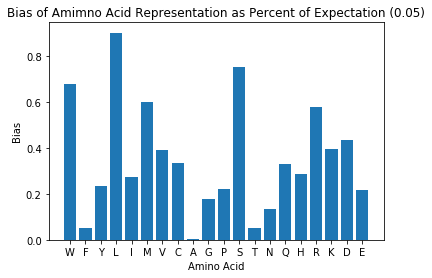

In [102]:
# Plot bias as function of amino acid

plt.bar(x, bias.T)
plt.title("Bias of Amimno Acid Representation as Percent of Expectation (0.05)")
plt.xlabel("Amino Acid")
plt.ylabel("Bias")
plt.xticks(x, num_aa)
plt.show()

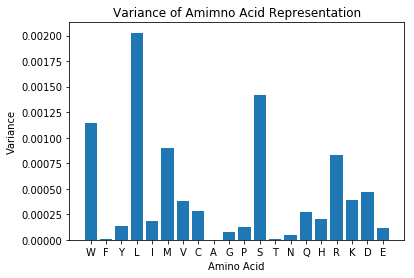

In [103]:
# Plot variance as function of amino acid 
# Plot bias as function of amino acid

plt.bar(x, variance.T)
plt.title("Variance of Amimno Acid Representation")
plt.xlabel("Amino Acid")
plt.ylabel("Variance")
plt.xticks(x, num_aa)
plt.show()

In [ ]:
# Plot avg aa representation as function of position in WT
plt.bar(len(WT), )